In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
import tensorflow as tf

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Atividade 3 ML/barrettII_eyes_clustering.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,AL,ACD,WTW,K1,K2,Correto
0,0,"23,79","3,32",12,"43,6","44,29",S
1,1,"24,6","3,39","12,3","42,03","43,95",S
2,2,"24,59","3,51","12,3","42,83","43,05",S
3,3,"24,04","2,96",12,"42,35","42,83",S
4,4,"24,8","2,44","12,2","41,01","41,67",S


## Visualização dos dados ##

Primeiramente vamos realizar uma visualização dos dados e da correlação entre os mesmos para entender sua disposição espacial dos dados a serem agrupados.

In [ ]:
df['AL'] = df['AL'].str.replace(',', '.').astype(float)
df['AL'] = tf.convert_to_tensor(df['AL'], dtype=tf.float32)
df['ACD'] = df['ACD'].str.replace(',', '.').astype(float)
df['ACD'] = tf.convert_to_tensor(df['ACD'], dtype=tf.float32)
df['WTW'] = df['WTW'].str.replace(',', '.').astype(float)
df['WTW'] = tf.convert_to_tensor(df['WTW'], dtype=tf.float32)
df['K1'] = df['K1'].str.replace(',', '.').astype(float)
df['K1'] = tf.convert_to_tensor(df['K1'], dtype=tf.float32)
df['K2'] = df['K2'].str.replace(',', '.').astype(float)
df['K2'] = tf.convert_to_tensor(df['K2'], dtype=tf.float32)
df.loc[(df['Correto'] == 'S'), 'Correto'] = tf.convert_to_tensor(1, dtype=tf.float32)
df.loc[(df['Correto'] != 'S'), 'Correto'] = tf.convert_to_tensor(0, dtype=tf.float32)

In [ ]:
X = df.iloc[:, 1:6]
y = df['Correto']

<Axes: >

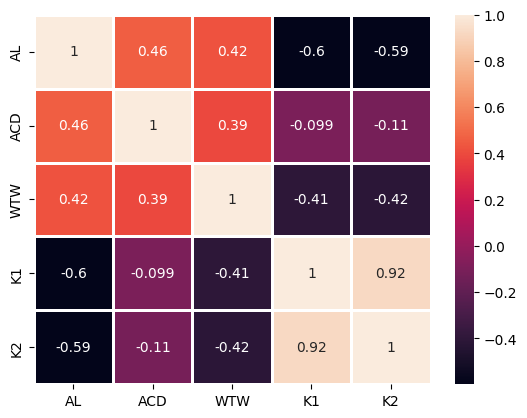

In [ ]:
import seaborn as sns

data = df.iloc[:, 1:6]

data_corr = data.corr(method='spearman')

sns.heatmap(data_corr, annot=True, linewidths=1)

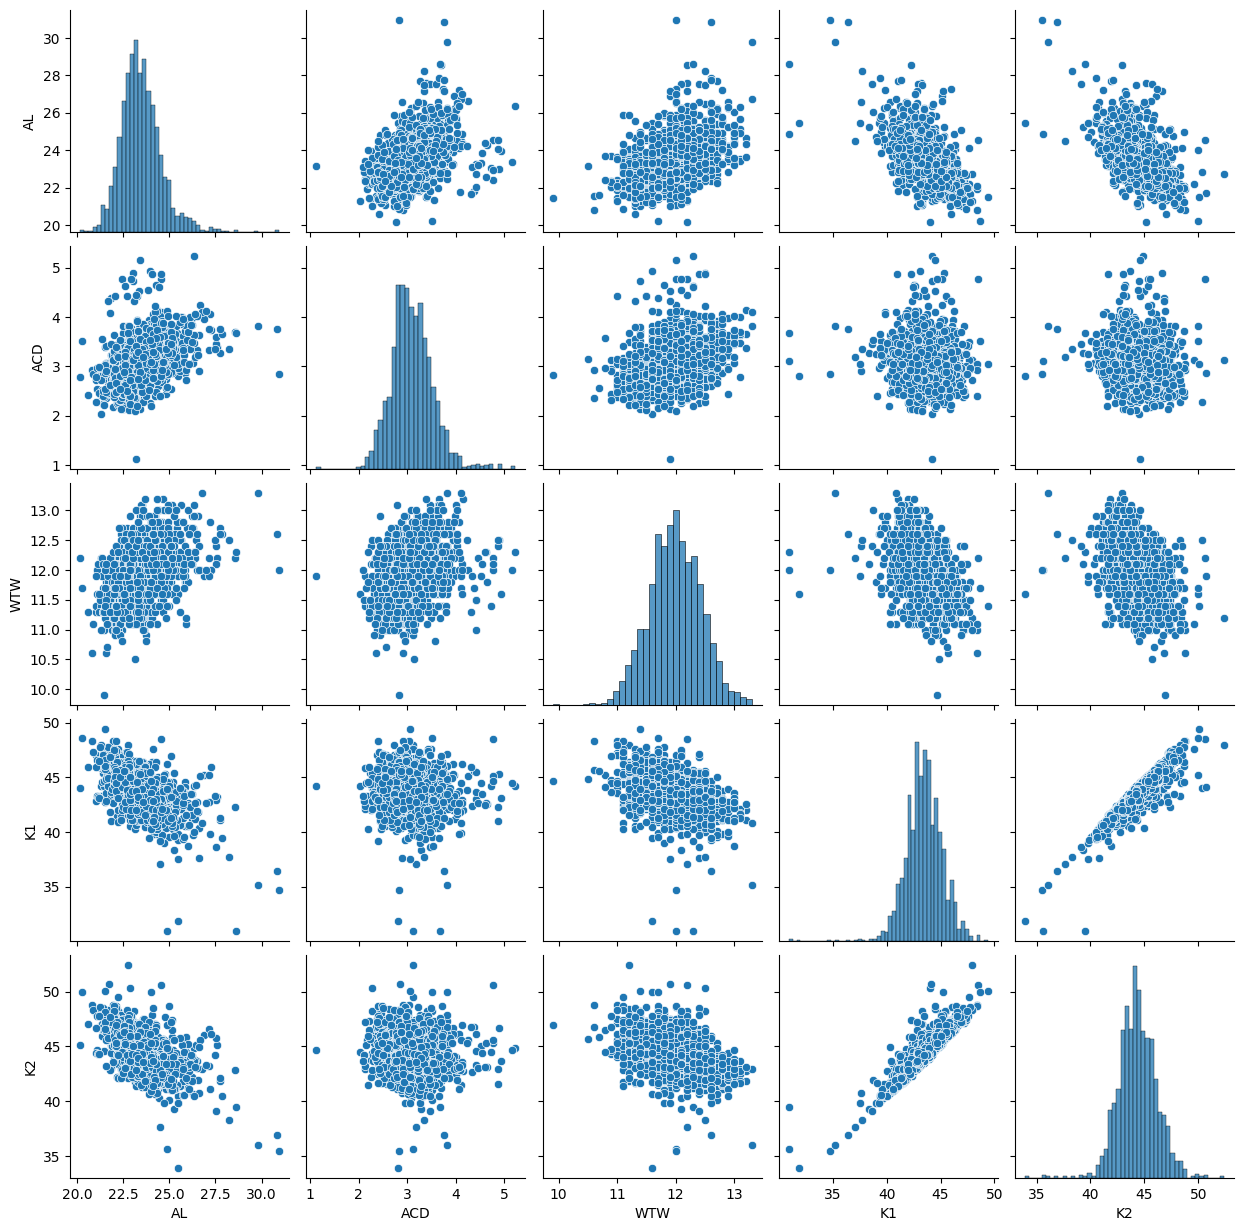

In [ ]:
sns.pairplot(data=X)

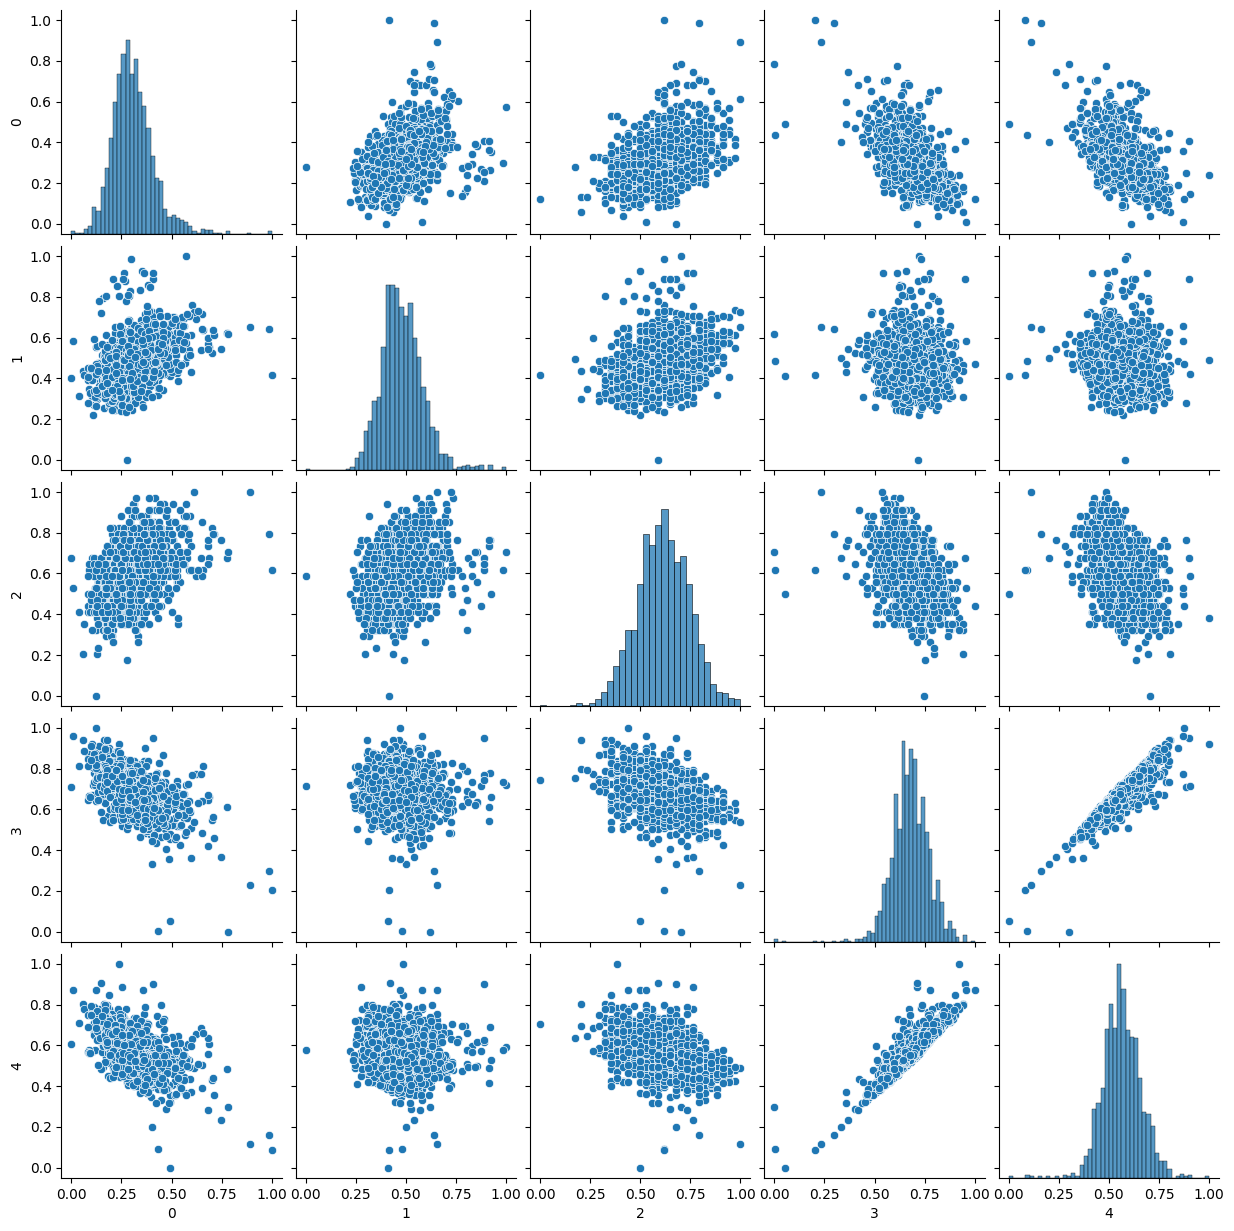

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(data)
data = scaler.transform(data)
data = pd.DataFrame(data)

sns.pairplot(data=data)

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
  model = KMeans(n_clusters=i, random_state=42, algorithm='elkan', tol=0.005)
  model.fit(data)

  wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

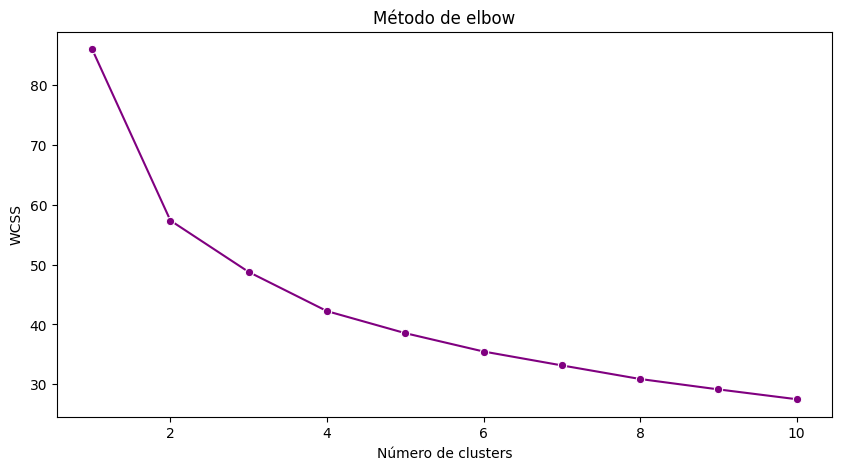

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='purple')
plt.title('Método de elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
print(abs(np.diff(wcss, 2)))

[20.0308075   2.05490875  2.85990906  0.61638641  0.74545288  0.04825592
  0.53667068  0.09456825]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data2d = pca.fit_transform(data)

model = KMeans(n_clusters=4, random_state=42, algorithm='elkan', tol=0.005)
model.fit_predict(data2d)

centroids = model.cluster_centers_
labels = model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-46-a15db290803b>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_points0[:, 0], data_points0[:, 1], c=colors[0], label=f'Cluster{0}')
<ipython-input-46-a15db290803b>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_points1[:, 0], data_points1[:, 1], c=colors[1], label=f'Cluster{1}')
<ipython-input-46-a15db290803b>:13: UserWarning: *c* argument looks like a single numeric RG

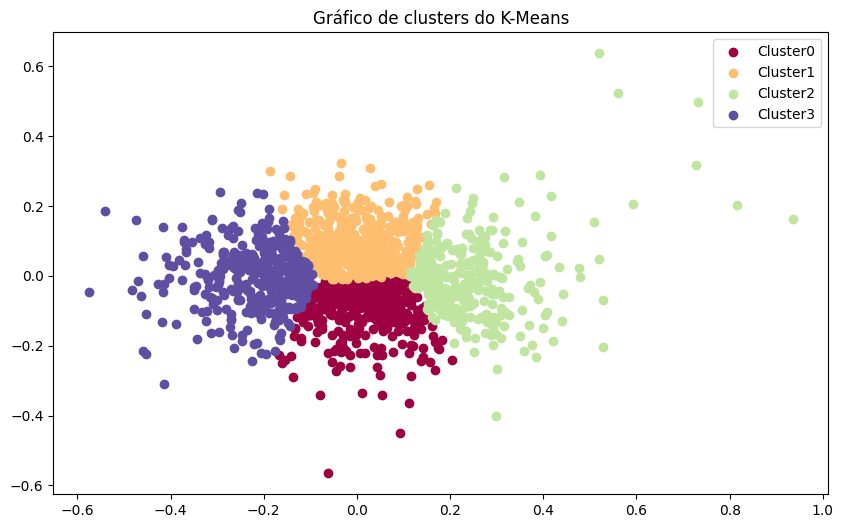

In [ ]:
import matplotlib.pyplot as plt

colors = plt.cm.Spectral(np.linspace(0, 1, 4))

plt.figure(figsize=(10,6))
data_points0 = np.array(data2d[labels == 0])
data_points1 = np.array(data2d[labels == 1])
data_points2 = np.array(data2d[labels == 2])
data_points3 = np.array(data2d[labels == 3])

plt.scatter(data_points0[:, 0], data_points0[:, 1], c=colors[0], label=f'Cluster{0}')
plt.scatter(data_points1[:, 0], data_points1[:, 1], c=colors[1], label=f'Cluster{1}')
plt.scatter(data_points2[:, 0], data_points2[:, 1], c=colors[2], label=f'Cluster{2}')
plt.scatter(data_points3[:, 0], data_points3[:, 1], c=colors[3], label=f'Cluster{3}')

plt.legend()
plt.title('Gráfico de clusters do K-Means')
plt.show()

In [ ]:
data0 = [i for i in model.labels_ if i == 0]
data1 = [i for i in model.labels_ if i == 1]
data2 = [i for i in model.labels_ if i == 2]
data3 = [i for i in model.labels_ if i == 3]

ValueError: ignored